This Mini Project will give you a glimpse of **"How to do a Real World Data science Project!"**

Here are few steps:


*   Import necessary libraries and modules
(you need not to know every library at the start,you can always add them later)
*   Download the dataset
*   Load the Dataset by using Pandas
*   clean and understand the Data set 
*   understand the Data set more by Visualization
*   Start Pre-processing of the Data set
*   Come to conclusion whether its classification/clustering
*   **apply machine learning algorithms related to classification/clustering (only 1 for now)** and evaluate the algorithm using different matrices like f1_score,jaccard-index,log_loss.


Choose any one of the Machine Learning Algorithm:

**1.k-nearest neighbors |
2.Decision trees  |
3.Support Vector Machine  |
4.Logistic Regression |**  



# Import necessary libraries and modules
(you need not to know every library at the start,you can always add them later)

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-16 09:44:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.08s   

2020-08-16 09:44:40 (271 KB/s) - ‘loan_train.csv’ saved [23101/23101]



This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

#   Load the Dataset by using Pandas


In [3]:
df = pd.read_csv('/content/loan_train.csv')


# clean and understand the Data set 

In [4]:
#see first 5 rows of your dataframe

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
#see shape of your dataframe

df.shape

(346, 10)

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['loan_status']=le.fit_transform(df['loan_status'])
df['Gender']=le.fit_transform(df['Gender'])
df['education']=le.fit_transform(df['education'])


### Convert to date time object 

In [7]:
#convert both due_date and effective_date to datetime object

from datetime import datetime




for i in range(len(df)):

  date_d2=datetime.strptime(df['effective_date'][i], '%m/%d/%Y')
  date_d3=datetime.strptime(df['due_date'][i],'%m/%d/%Y')



# understand the Data set more by Visualization



Let’s see how many of each class is in our data set 

In [8]:
# use value counts to see how many each class count is present in the dataframe


df['loan_status'].value_counts()

1    260
0     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


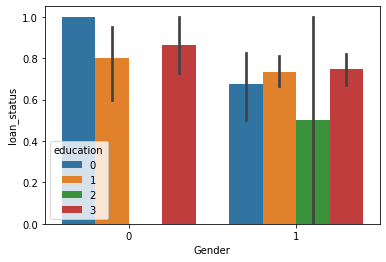

In [9]:
import seaborn as sns
# plot loan status paidoff/collected by gender i.e male and female



sns.barplot(x='Gender', y = 'loan_status', hue = 'education', data = df)







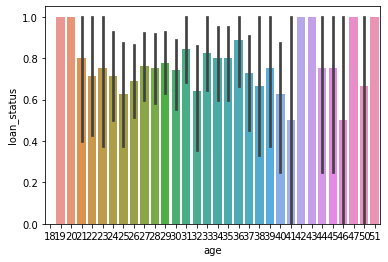

In [10]:
# plot loan paidoff/collected by gender i.e male and female along with their age

sns.barplot(x='age',y='loan_status',data=df)


# Start Pre-processing of the Data set
##### Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

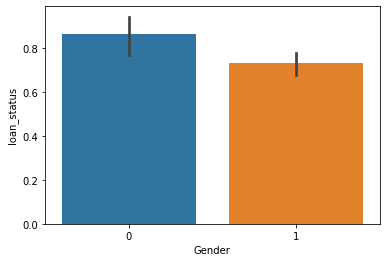

In [11]:
#plot loan status of male and female on different days of a Week!
sns.barplot(x='Gender', y = 'loan_status', data = df)





We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
#use grouby function on Gender and loan_status along with value_counts



df.groupby('Gender')['loan_status'].value_counts()



Gender  loan_status
0       1               45
        0                7
1       1              215
        0               79
Name: loan_status, dtype: int64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)



## One Hot Encoding  
#### How about education?

In [15]:
#use grouby function on education and loan_status along with value_counts

df.groupby('education')['loan_status'].value_counts()

education  loan_status
0          1               33
           0               11
1          1              112
           0               39
2          0                1
           1                1
3          1              114
           0               35
Name: loan_status, dtype: int64

#### Feature before One Hot Encoding

In [16]:
#select what features you want to include in your dataframe
df.drop(['Unnamed: 0','Unnamed: 0.1','effective_date',	'due_date'],inplace=True,axis=1)





#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
df1=pd.get_dummies(data=df, columns=['education'])

In [18]:
df1.head()

,loan_status,Principal,terms,age,Gender,education_0,education_1,education_2,education_3
0,1,1000,30,45,1,0,1,0,0
1,1,1000,30,33,0,1,0,0,0
2,1,1000,15,27,1,0,0,0,1
3,1,1000,30,28,0,0,0,0,1
4,1,1000,30,29,1,0,0,0,1


### Feature selection

Lets defind feature sets, X:

In [19]:
#define x

X=df1.iloc[:,:].values



What are our lables?

In [20]:
#define y
y = df.pop('loan_status')


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [24]:

#Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)



# Come to conclusion whether its classification/clustering

In [22]:
# write your answer here

CLASSIFICATION PROBLEM


SyntaxError: ignored

#    **apply machine learning algorithms related to classification/clustering (only 1 for now)** and evaluate the algorithm using different matrices


Choose any one of the Machine Learning Algorithm:

**1.k-nearest neighbors |
2.Decision trees  |
3.Support Vector Machine  |
4.Logistic Regression |**  


Now, it is your turn, use the training set to build an accurate model. 

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

## Finding the best k neighbors to improve  accuracy of the model

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  3]
 [ 0 56]]


# Decision Tree

In [26]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  1.0


# Support Vector Machine

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0]
 [ 0 56]]


### evaluation by using  f1_score , jaccard-index

In [38]:

from sklearn.metrics import jaccard_similarity_score

jaccard_svm = jaccard_similarity_score(y_test, y_pred)
print("Support Vector Machine(SVM) Jaccard index: ", jaccard_svm)
from sklearn.metrics import f1_score

f1_score_svm = f1_score(y_test, y_pred, average='weighted')
print("Support Vector Machine(SVM) F1-score: ", f1_score_svm)

Support Vector Machine(SVM) Jaccard index:  1.0
Support Vector Machine(SVM) F1-score:  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Logistic Regression

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(X_train, y_train)


print("Training score: ",logis_score_train)

logis_score_test = logis.score(X_train, y_train)
print("Testing score: ",logis_score_test)

Training score:  1.0
Testing score:  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### evaluation using f1_score , jaccard_index , log_loss

In [42]:
#from sklearn import jaccard_similarity_score

jaccard_log = jaccard_similarity_score(y_test, y_pred)
print("KNN Jaccard index: ", jaccard_log)

f1_score_log = f1_score(y_test, y_pred, average='weighted')
print("LG F1-score: ", f1_score_log)



KNN Jaccard index:  1.0
LG F1-score:  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [45]:
yhat_logReg = logis.predict(X_test)
yhat_logReg_prob = logis.predict_proba(X_test)

jaccard_logReg = jaccard_similarity_score(y_test, yhat_logReg)

print("Logistic Regression Jaccard index: ", jaccard_logReg)
f1_score_logReg = f1_score(y_test, yhat_logReg, average='weighted')

print("Logistic Regression F1-score: ", f1_score_logReg)


from sklearn.metrics import log_loss

logloss_logReg = log_loss(y_test, yhat_logReg_prob)

print("Logistic Regression log loss: ", logloss_logReg)



Logistic Regression Jaccard index:  1.0
Logistic Regression F1-score:  1.0
Logistic Regression log loss:  0.0268809700566645


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
